# A very basic exploration

In this example, we will perform a basic exploration with `mopet`. To demonstrate the usage, we will simply scan a 2D surface and, at each point, return a number that is equal to the distance to a unit circle. Of course, this is not a realistic experiment for parameter exploration but it serves as a simplified example.

In [1]:
# change into the root directory of the project
import os
if os.getcwd().split("/")[-1] == "examples":
    os.chdir('..')
    
%load_ext autoreload
%autoreload 2

import logging
logger = logging.getLogger()
logger.setLevel(logging.INFO)

In [ ]:
import numpy as np
!pip install matplotlib
import matplotlib.pyplot as plt
import mopet

# a nice color map
plt.rcParams['image.cmap'] = 'plasma'

def evalFunction(params):
    result_float = abs((params["x"] ** 2 + params["y"] ** 2) - 1)
    result_array = np.random.randn(np.random.randint(1, 131), np.random.randint(1, 5000))
    result = {}
    result["float_result"] = result_float
    result["array_result"] = result_array
    return result

explore_params = {"x": np.linspace(-2, 2, 21), "y": np.linspace(-2, 2, 21)}

# we need this random filename to avoid testing clashes
hdf_filename = f"exploration-{np.random.randint(99999)}.h5"
ex = mopet.Exploration(evalFunction, explore_params, hdf_filename=hdf_filename)

In [3]:
ex.run()

2021-02-15 13:58:23,782	INFO resource_spec.py:212 -- Starting Ray with 3.91 GiB memory available for workers and up to 1.96 GiB for objects. You can adjust these settings with ray.init(memory=<bytes>, object_store_memory=<bytes>).
2021-02-15 13:58:24,138	INFO services.py:1093 -- View the Ray dashboard at localhost:8265
INFO:root:Starting 441 jobs.
100%|██████████| 441/441 [00:00<00:00, 457.14it/s]
INFO:root:Runs took 0.9735679626464844 s to submit.
100%|██████████| 441/441 [00:03<00:00, 118.17it/s]
INFO:root:Runs and storage took 3.7421679496765137 s to complete.


In [7]:
ex.load_results(arrays=True)

INFO:root:exploration-55740.h5 opened for reading.
INFO:root:Gettings runs of exploration ``exploration_2021_02_15_13H_58M_23S``
100%|██████████| 441/441 [00:00<00:00, 903.61it/s]
INFO:root:Creating new results DataFrame
INFO:root:Aggregating all results ...
100%|██████████| 441/441 [00:01<00:00, 413.07it/s]
INFO:root:exploration-55740.h5 closed.


In [5]:
len(ex.results)

441

In [6]:
ex.get_run(0)

INFO:root:exploration.h5 opened for reading.


{'array_result': array([[ 5.97391695e-01, -1.85095801e+00,  6.36841315e-01, ...,
         -3.62676558e-01, -2.09826990e-01,  1.40291897e+00],
        [ 1.75607948e+00,  1.05066847e+00,  8.95172810e-01, ...,
         -7.77506344e-01, -9.06090056e-01,  9.48383121e-04],
        [-2.20332623e-01,  6.78649005e-01, -8.93520258e-01, ...,
         -2.22872632e+00, -1.19226748e+00, -1.38276576e-01],
        ...,
        [ 7.76605125e-01, -5.22077056e-01,  4.18754799e-01, ...,
          1.15120920e+00, -3.58705657e-01, -9.63737910e-01],
        [ 2.55826835e+00, -5.37584683e-01,  6.39454329e-01, ...,
         -1.99267714e-01,  5.92317635e-01, -7.96497612e-01],
        [ 3.18325277e-01,  2.13536242e+00,  1.12065066e+00, ...,
         -4.70540293e-01,  1.08954728e+00,  4.97407056e-01]]),
 'float_result': 7.0}

In [7]:
for r in ex.df.index:
    ex.df.loc[r, "mean_array_result"] = np.mean(ex.get_run(r)['array_result'])

In [8]:
ex.df.dropna(axis='columns', how='all')

,x,y,float_result,mean_array_result
0,-2,-2,7.00,0.006656
1,-2,-1.8,6.24,0.000567
10,-2,0,3.00,0.002344
100,-1.2,1.2,1.88,-0.000210
101,-1.2,1.4,2.40,0.003098
...,...,...,...,...
95,-1.2,0.2,0.48,0.003001
96,-1.2,0.4,0.60,-0.000337
97,-1.2,0.6,0.80,0.001959
98,-1.2,0.8,1.08,-0.010278


In [9]:
pivoted = ex.df.pivot_table(values='float_result', index = 'y', columns='x', aggfunc='first')

Text(0, 0.5, 'y')

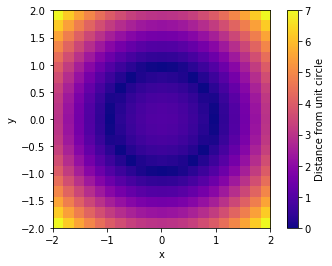

In [10]:
plt.imshow(pivoted, \
           extent = [min(ex.df.x), max(ex.df.x),
                     min(ex.df.y), max(ex.df.y)], origin='lower')
plt.colorbar(label='Distance from unit circle')
plt.xlabel("x")
plt.ylabel("y")